# Recognizing handwritten digits

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Get data

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print(f"X Train Shape: {X_train.shape}")
print(f"y Train Shape: {y_train.shape}")

print(f"X Test Shape: {X_test.shape}")
print(f"y Test Shape: {y_test.shape}")

X Train Shape: (60000, 28, 28)
y Train Shape: (60000,)
X Test Shape: (10000, 28, 28)
y Test Shape: (10000,)


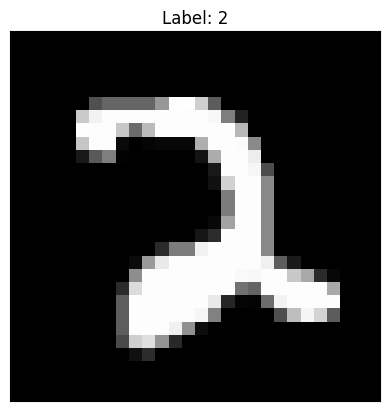

In [5]:
plt.imshow(X_train[4610], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title(f"Label: {y_train[4610]}")
plt.show()

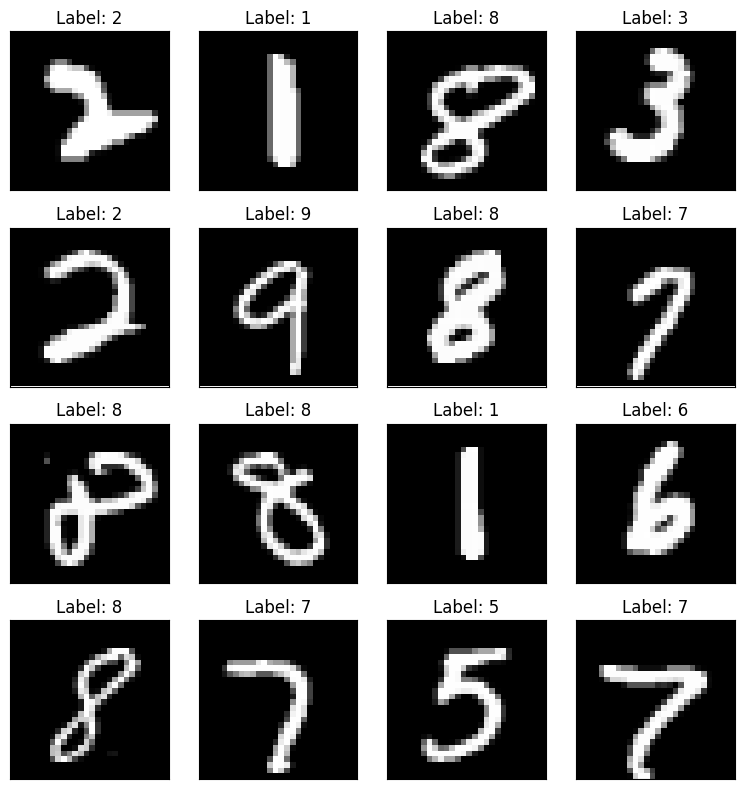

In [6]:
plt.figure(figsize=(8, 8))
n = 4
for i in range(n * n):
    plt.subplot(n, n, i + 1)
    random_idx = np.random.randint(0, X_train.shape[0])
    plt.imshow(X_train[random_idx], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Label: {y_train[random_idx]}")
    plt.tight_layout()

plt.show()

### Y value transformation to array

In [7]:
Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
print(y_train[6942])
print(Y_train[6942])

8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [9]:
print(y_train[3897])
print(Y_train[3897])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


### Normalizing data

In [10]:
X_train_normalized = X_train / 255
X_test_normalized = X_test / 255

In [11]:
print(X_train[369])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 113 244 195   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    6  91 236 249  73   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  44   0   0   0   0   0   0
   23 252 252 150   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  47 238 152   0   0   

In [12]:
print(X_train_normalized[369])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

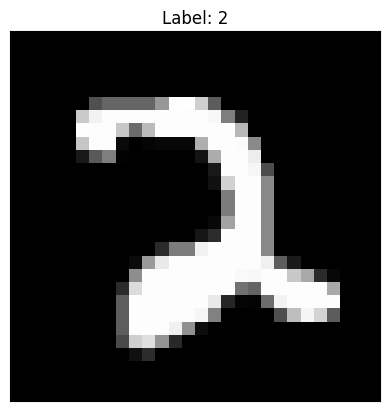

In [13]:
plt.imshow(X_train_normalized[4610], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title(f"Label: {y_train[4610]}")
plt.show()

## Making the model (Sequential, using flatten and dense) (Non-CNN)

In [14]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

/Users/andrewlou/Documents/Coding/NYU-Machine-Learning/.venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [17]:
history = model.fit(X_train_normalized, Y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.9177 - loss: 0.2830
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.9646 - loss: 0.1175
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.9747 - loss: 0.0827
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.9801 - loss: 0.0645
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.9836 - loss: 0.0512


In [18]:
Y_hat = model.predict(X_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step


In [19]:
Y_hat[1976]

array([9.2641343e-09, 3.8437256e-07, 4.2342802e-07, 9.9622357e-01,
       2.7520302e-12, 3.7232705e-03, 5.4793507e-13, 5.6498376e-08,
       4.1348758e-07, 5.1893050e-05], dtype=float32)

In [20]:
np.argmax(Y_hat[1976])

np.int64(3)

In [21]:
y_hat = np.argmax(Y_hat, axis=-1)

In [22]:
test_accuracy = np.mean(y_hat == y_test)
print(y_hat)
print(test_accuracy)

[7 2 1 ... 4 5 6]
0.9768


# __CNN__

In [23]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [34]:
# Two convolutional layers
# Then fully connected feed-forward

cnn_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [35]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,922 (480.16 KB)

 Trainable params: 122,922 (480.16 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
cnn_history = cnn_model.fit(X_train_normalized, Y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9464 - loss: 0.1740
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9846 - loss: 0.0509
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9891 - loss: 0.0363
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9911 - loss: 0.0279
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9929 - loss: 0.0219


Text(0, 0.5, 'Accuracy')

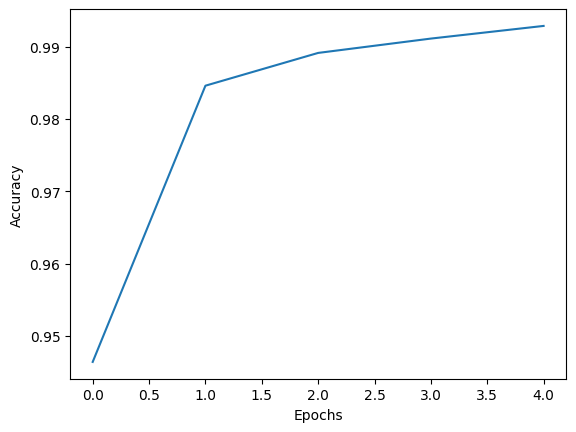

In [38]:
plt.plot(cnn_history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [39]:
cnn_preds = cnn_model.predict(X_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [40]:
cnn_y_pred = np.argmax(cnn_preds, axis=-1)

In [41]:
cnn_test_acc = np.mean(cnn_y_pred == y_test)
print(cnn_test_acc)

0.9895


In [42]:
cnn_model.save('model1.keras')

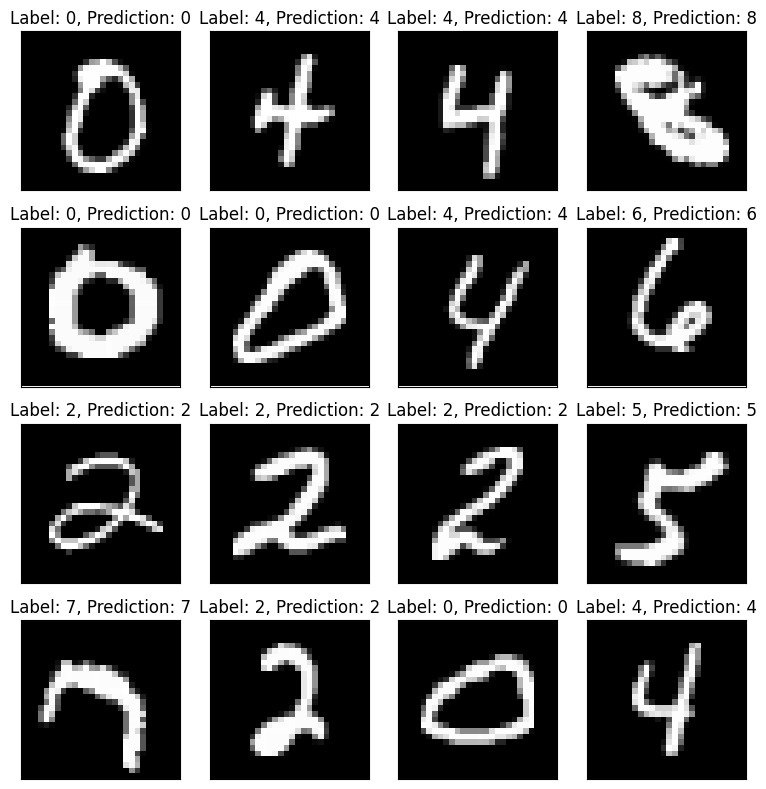

In [43]:
plt.figure(figsize=(8, 8))
n = 4
for i in range(n * n):
    plt.subplot(n, n, i + 1)
    random_idx = np.random.randint(0, X_test.shape[0])
    plt.imshow(X_test[random_idx], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Label: {y_test[random_idx]}, Prediction: {cnn_y_pred[random_idx]}")
    plt.tight_layout()

plt.show()